<p style="text-align: center;" ><font size="+3"><u><b>Laboratory 3 Part 1: Linear systems theory applied to optical imaging systems</u></b></p>

<p style="text-align: left;" ><font size="+1"><b>Objectives</b></p>

<div class="alert alert-block alert-warning">
<font color=black>

- Understand linear system analysis in 1D and 2D, be able to perform convolution, cross correlation, and autocorrelation in Python
- Basic optical imaging system modeling
- Simulate an optical system with a perfect lens in Python
- Measure the point spread function of your microscope

</font>
</div>

<p style="text-align: left;" ><font size="+1"><b>Introduction / Basic Rules</b></p>

<div class="alert alert-block alert-warning">
<font color='black'>

We have revised linear systems in 1D and extended the analysis to 2D signals. In this lab, you will first perform convolution exercises in Python. <br/>
We will then write a simulator for a perfect optical system in Python and see how the PSF of your microscope affects the final image output. </font>
</div>

# Convolution in Python

<div class="alert alert-block alert-success">
<font color='black'>

1. If you have a signal $f$ that is on $N_f \times M_f$, and a signal $g$ that is $N_g \times M_g$, what is the size of ($f * g$)?
</font>
</div>

The size of f*g is (N_f+N_g-1)x(M_f+M_g-1).

<div class="alert alert-block alert-warning">
<font color='black'>
Convolution in Python can be performed using `convolve` in 1D and `convolve2d` in 2D. To do this, first import the following functions:

`import scipy` <br/>
`from scipy.signal import convolve2d` <br/>
    
    
By default, `convolve2d` returns the full size of the convolution results. <br/> For many applications, we want to keep the size of the output the same as one of the signals. The following would give an output that is the same size as $f$: <br/>

`convolve2d(f, g, 'same')`<br/>

Now let’s perform some convolutions and try to interpret the results.<br/>
Load the image we provided, `SanFrancisco.npy`, into Python. <br/>
Show the image below. Assume each pixel is 1mm by 1mm.

</font>
</div>

<div class="alert alert-block alert-success">
<font color='black'>

2. Now let’s perform some convolutions and try to interpret the results.<br/>
Load the image we provided, `SanFrancisco.npy`, into Python. <br/>
Show the image below. Assume each pixel is 1mm by 1mm.

</font>
</div>

In [1]:
import scipy
from scipy.signal import convolve2d
from google.colab import files
uploaded = files.upload()


Saving SanFrancisco.npy to SanFrancisco (1).npy


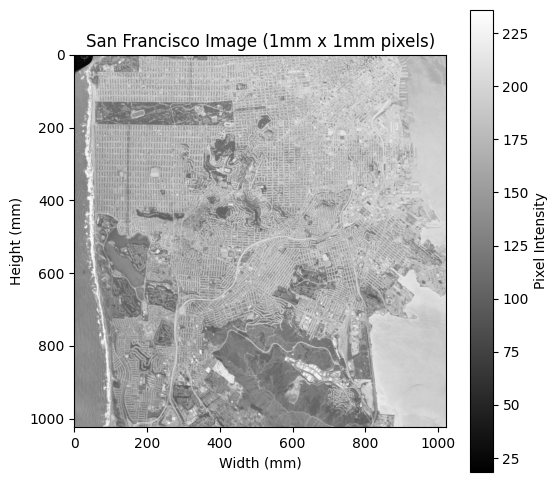

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image
f = np.load('SanFrancisco.npy')

# Show the image
plt.figure(figsize=(6, 6))
plt.imshow(f, cmap='gray', extent=[0, f.shape[1], f.shape[0], 0])  # each pixel = 1mm
plt.title("San Francisco Image (1mm x 1mm pixels)")
plt.xlabel("Width (mm)")
plt.ylabel("Height (mm)")
plt.colorbar(label='Pixel Intensity')
plt.show()


<div class="alert alert-block alert-success">
<font color='black'>

3. Make a Gaussian kernel using the code below: <br/>

`from functions import gauss2d` <br/>
`h = gauss2d((52, 52), 3)`

Assume the same pixel spacing (1 mm) as above. Paste the result below:
</font>
</div>

In [3]:
  from google.colab import drive
  drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
  import sys
  sys.path.append('/content/drive/MyDrive/1. EN.580.494.01 Build an Imager/Build_Imager/Lab3') # Replace 'your_folder' with the actual path

In [5]:
  import functions

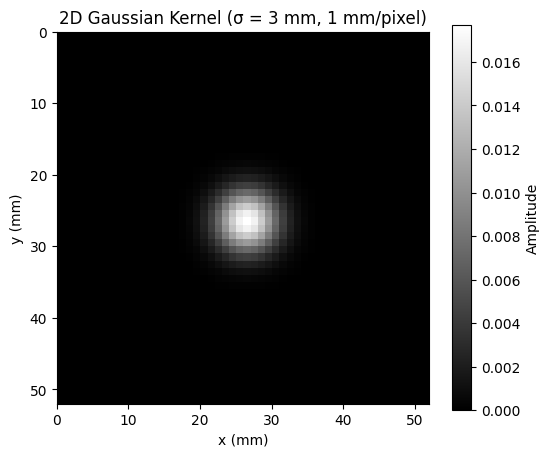

In [6]:
import matplotlib.pyplot as plt

from functions import gauss2d
# Generate Gaussian kernel
h = gauss2d((52, 52), 3)

# Plot it
plt.figure(figsize=(6, 5))
plt.imshow(h, cmap='gray', extent=[0, 52, 52, 0])
plt.colorbar(label='Amplitude')
plt.title('2D Gaussian Kernel (σ = 3 mm, 1 mm/pixel)')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.show()


<div class="alert alert-block alert-success">
<font color='black'>

4. If the image is the input to an arbitrary system and `h` is the impulse response of the system, what is the output of the system? <br/> Keep the size of the output the same as the image. Paste your results below. Explain what you see in both the spatial domain and in the frequency domain (i.e., what is the transfer function of the system and how is it affecting the output?)
    
</font>
</div>

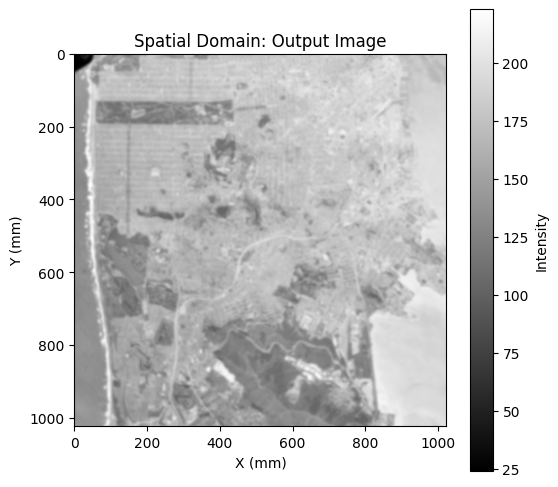

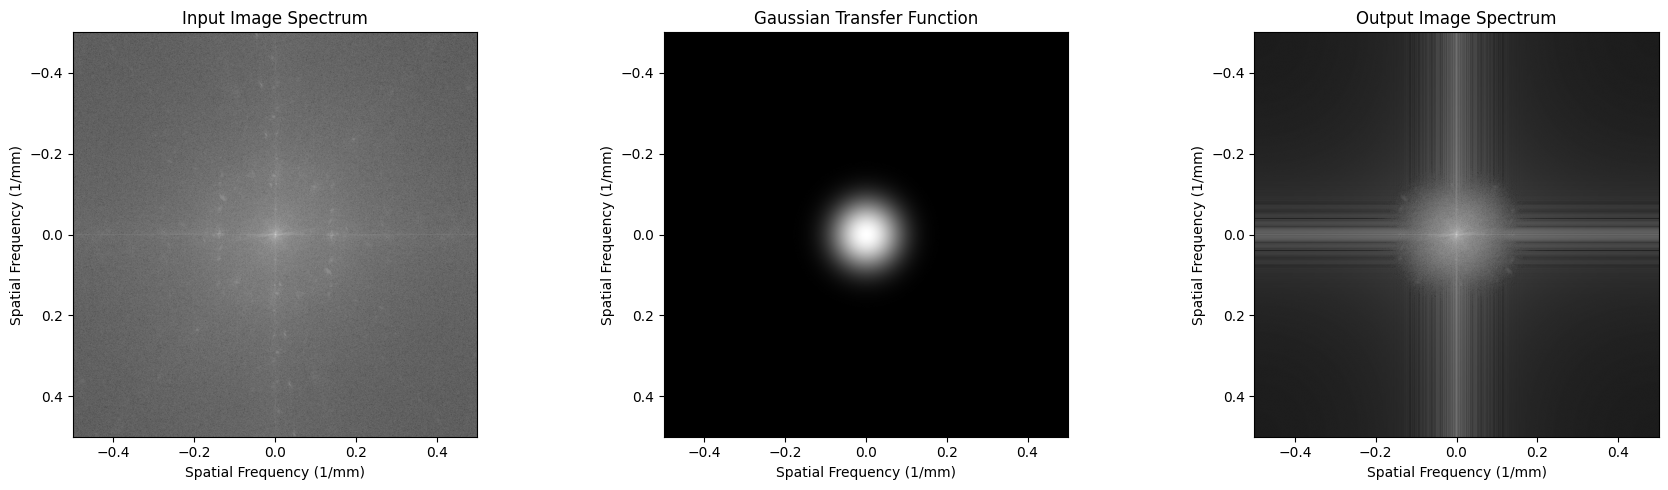

In [7]:
from numpy.fft import fft2, fftshift, ifft2
# Convolve
output = convolve2d(f, h, mode='same', boundary='symm')

# -- Spatial Domain Plot --
height, width = f.shape
plt.figure(figsize=(6,6))
plt.imshow(output, cmap='gray', extent=[0, width, height, 0])
plt.title("Spatial Domain: Output Image")
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.colorbar(label='Intensity')
plt.grid(False)
plt.show()

# -- Frequency Domain Plots --
F = fftshift(np.abs(fft2(f)))
H = fftshift(np.abs(fft2(h, s=f.shape)))
G = fftshift(np.abs(fft2(output)))

x_freq = np.linspace(-0.5, 0.5, width)
y_freq = np.linspace(-0.5, 0.5, height)

extent_freq = [x_freq[0], x_freq[-1], y_freq[-1], y_freq[0]]  # center 0 at middle

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].imshow(np.log(1 + F), cmap='gray', extent=extent_freq)
axs[0].set_title("Input Image Spectrum")
axs[0].set_xlabel("Spatial Frequency (1/mm)")
axs[0].set_ylabel("Spatial Frequency (1/mm)")

axs[1].imshow(np.log(1 + H), cmap='gray', extent=extent_freq)
axs[1].set_title("Gaussian Transfer Function")
axs[1].set_xlabel("Spatial Frequency (1/mm)")
axs[1].set_ylabel("Spatial Frequency (1/mm)")

axs[2].imshow(np.log(1 + G), cmap='gray', extent=extent_freq)
axs[2].set_title("Output Image Spectrum")
axs[2].set_xlabel("Spatial Frequency (1/mm)")
axs[2].set_ylabel("Spatial Frequency (1/mm)")

plt.tight_layout()
plt.show()

The input image is convolved with a 2D Gaussian filter which produces a blurred output. In the spatial domain, the edges and fine details are smoothed while the overall structure and color shading remains similar to the original picture. This happens because the Gaussian filter averages nearby pixel values and reduces sharp intensity changes.

The transfer function of the system appears as a centered dot which means it emphasizes low frequencies. It suppresses high-frequency content like noise and sharp edges, so it acts like a low-pass filter to smooth and blur the image.

<div class="alert alert-block alert-success">
<font color='black'>

5. Now try to perform the same convolution in the Fourier domain using the convolution theorem and see if you get the same results back. <br/> Note that you would need to zero pad `h` to the same size as the image. You can achieve this with the `np.pad` function in Python. <br/> Paste your code and your image output below. Is the output (exactly) the same as what you got previously using convolution? Please explain what you see.
    
</font>
</div>

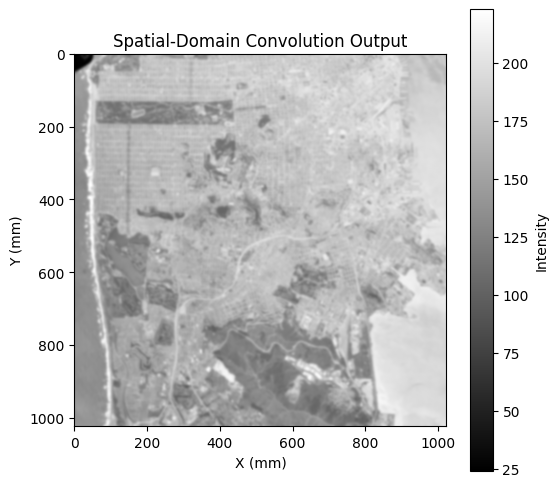

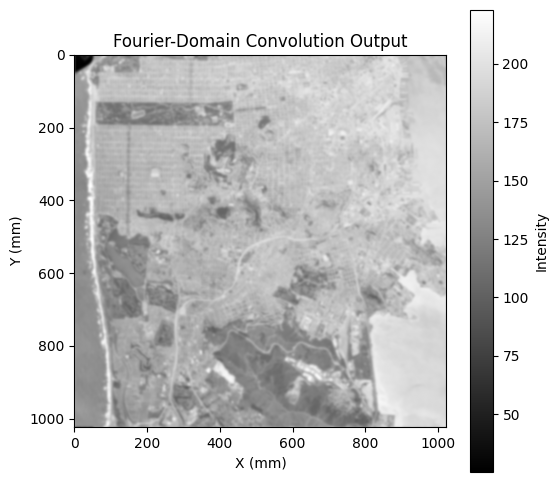

In [8]:
from numpy.fft import fft2, ifft2, fftshift, ifftshift

# Load the image
f = np.load('SanFrancisco.npy')
H, W = f.shape

# Create Gaussian kernel
h = gauss2d((52, 52), 3)

# ==== Spatial convolution for reference ====
out_spatial = convolve2d(f, h, mode='same', boundary='symm')

# ==== Fourier-domain convolution ====

# 1. Zero pad h to match shape of f
pad_y = H - h.shape[0]
pad_x = W - h.shape[1]
h_padded = np.pad(h, (((pad_y + 1) // 2, pad_y // 2),
                      ((pad_x + 1) // 2, pad_x // 2)), mode='constant')

# 2. Shift h so its center moves to (0,0) for FFT
h_shifted = ifftshift(h_padded)

# 3. Compute FFTs
F_f = fft2(f)
F_h = fft2(h_shifted)

# 4. Multiply in frequency domain
F_out = F_f * F_h

# 5. Inverse FFT to get back to spatial domain
out_freq = np.real(ifft2(F_out))

# ==== Plot results ====

# Spatial convolution result
plt.figure(figsize=(6, 6))
plt.imshow(out_spatial, cmap='gray', extent=[0, W, H, 0])
plt.title("Spatial-Domain Convolution Output")
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.colorbar(label='Intensity')
plt.show()

# Fourier convolution result
plt.figure(figsize=(6, 6))
plt.imshow(out_freq, cmap='gray', extent=[0, W, H, 0])
plt.title("Fourier-Domain Convolution Output")
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.colorbar(label='Intensity')
plt.show()


Yes, the images look the same visually and both look blurred from the original. This is expected because the system's impulse response is a Gaussian filter, which acts as a low-pass filter.

A Gaussian filter smooths the image and reduces sharp edges and texture (the high freq components) while keeping overall intensity changes (low freq components) since the colors look similar to the original.  

According to the Convolution Theorem, convolving an image with a filter in the spatial domain is equivalent to multiplying their Fourier transforms in the frequency domain. This means that whether we perform the convolution directly in the spatial domain or in the frequency domain should produce identical output.

<div class="alert alert-block alert-success">
<font color='black'>
6. Make the following two filters/kernels in Python: <br/>
Perform convolution of each filter with the image. Paste your image below. Explain what you see using both spatial domain and frequency domain descriptions.
</font>
</div>

<img src="Lab3\kernel.png" style="width:400px">

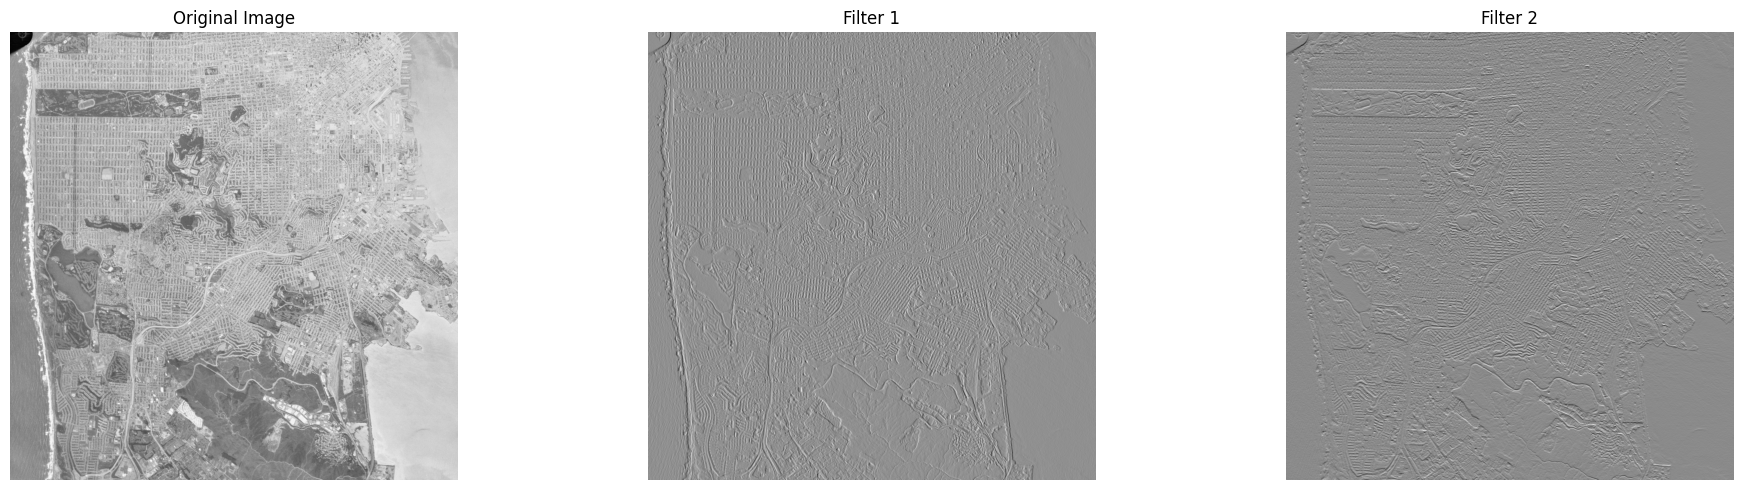

In [9]:
# Load image
f = np.load('SanFrancisco.npy')
H, W = f.shape

# Define filters
filter1 = np.array([[-1,  0,  1],
                    [-2,  0,  2],
                    [-1,  0,  1]])

filter2 = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

# Convolve with image
out_x = convolve2d(f, filter1, mode='same', boundary='symm')
out_y = convolve2d(f, filter2, mode='same', boundary='symm')

# Compute gradient magnitude
out_mag = np.sqrt(out_x**2 + out_y**2)

# Plot results
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].imshow(f, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(out_x, cmap='gray')
axs[1].set_title("Filter 1")
axs[1].axis('off')

axs[2].imshow(out_y, cmap='gray')
axs[2].set_title("Filter 2")
axs[2].axis('off')

plt.tight_layout()
plt.show()


Filter 1 has non zero values on the left and right side:
$$
\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}
$$

This filter subtracts pixel values on the left from those on the right. In the filtered image, vertical structures like the coastline, building edges, and north-south roads appear more prominently. The streets running east-west are less obvious.

Filter 2, has non zero values on the top and bottom:

$$
\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
$$

This kernel makes the horizontal edges more prominent by comparing pixel values above and below a given region. As a result, horizontal features such as rows of streets and the golden gate park and elevation contours are more enhanced in the output image 2.


# Pupil function and PSF Simulation

<div class="alert alert-block alert-warning">
<font color='black'> In this part of the lab, you will simulate a few pupil functions and compute the corresponding Point Spread Function (PSF) and Optical Transfer Function (OTF). </font>
</div>

<div class="alert alert-block alert-success">
<font color='black'>

1. Let’s first simulate a circular pupil function [`P(x,y)` in the notes]. <br/> On a 1001 by 1001 grid with a 0.1 mm sampling interval, simulate a centered circular pupil function with 12mm diameter. Paste your result below with axis labels and colorbar.

</font>
</div>

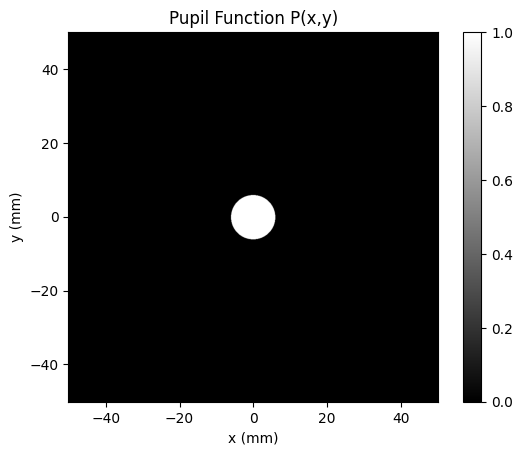

In [10]:
import numpy as np
import matplotlib.pyplot as plt

grid = 1001
sampling = 0.1
x = np.linspace(-grid//2, grid//2, grid) * sampling
y = np.linspace(-grid//2, grid//2, grid) * sampling
X, Y = np.meshgrid(x, y)

radius = 6
P = np.sqrt(X**2 + Y**2) <= radius # circular aperature defined in spatial domain

plt.imshow(P, extent=[x[0], x[-1], y[0], y[-1]], cmap='gray')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('Pupil Function P(x,y)')
plt.colorbar()
plt.show()


<div class="alert alert-block alert-success">
<font color='black'>

2. Compute the PSF of the pupil function. We can presume the axes of the pupil function are already scaled to the right imaging plane in this lab, i.e., you can compute the Fourier transform or autocorrelation of the pupil function directly. Paste your code below. Please also include 1) a surface plot of the PSF, 2) a surface plot of the log10 transformed PSF. For both figures, please zoom in on the central 201 by 201 pixels and include axis labels and colorbar. <br/>

You can produce a surface plot using the `ax.plot_surface(X, Y, Z)` function in Python: <br/>
More information about the surface plot can be found here: https://matplotlib.org/stable/gallery/mplot3d/surface3d.html

</font>
</div>

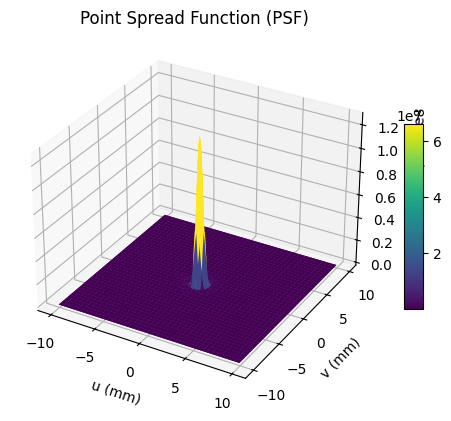

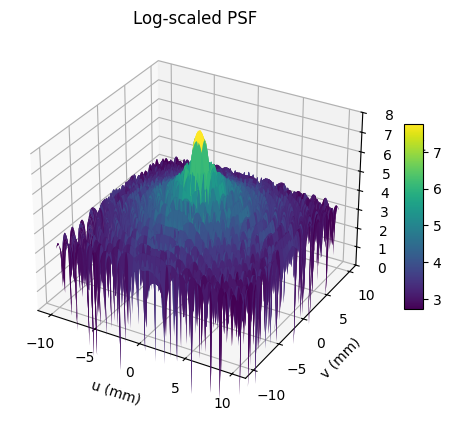

In [11]:
# Fourier transform of pupil function
h_uv = np.fft.fftshift(np.fft.fft2(P))

# Point spread function =|h(u,v)|^2
PSF = np.abs(h_uv)**2

# Zoom in on central 201 by 201 pixels
center = grid // 2
Z = PSF[center - 100 : center + 101, center - 100 : center + 101]
x_zoom = x[center - 100 : center + 101]
y_zoom = y[center - 100 : center + 101]
Xz, Yz = np.meshgrid(x_zoom, y_zoom)

from matplotlib import cm
from matplotlib.ticker import LinearLocator

# Surface plot of PSF
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(Xz, Yz, Z, cmap='viridis')
ax.set_xlabel('u (mm)')
ax.set_ylabel('v (mm)')
ax.set_zlabel('|h(u,v)|²')
plt.title("Point Spread Function (PSF)")
fig.colorbar(ax.plot_surface(Xz, Yz, Z, cmap='viridis'), shrink=0.5, aspect=10)
plt.show()

# Surface plot of log10 transformed PSF
Z_log = np.log10(Z)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(Xz, Yz, Z_log, cmap='viridis')
ax.set_zlim(0, 8)
ax.set_xlabel('u (mm)')
ax.set_ylabel('v (mm)')
ax.set_zlabel('log₁₀(|h(u,v)|²)')
plt.title("Log-scaled PSF")
fig.colorbar(ax.plot_surface(Xz, Yz, Z_log, cmap='viridis'), shrink=0.5, aspect=10)
plt.show()



<div class="alert alert-block alert-warning">
<font color='black'>

From the PSF, we can compute the Fourier domain transfer function of the system. This function is called the Optical Transfer Function (OTF), and is equal to the Fourier transform of the PSF normalized by the totally area under the PSF, or equivalently normalized by the DC value (`frequency = [0, 0]`) of the Fourier transform.
</font>
</div>

<div class="alert alert-block alert-success">
<font color='black'>

3. Compute the OTF. Past your code below and include both a regular plot (`ax.imshow`) and a surface plot (`ax.plot_surface`) of the OTF below.
</font>
</div>

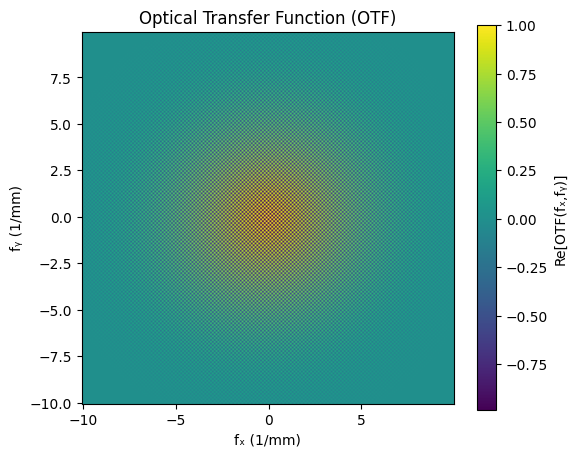

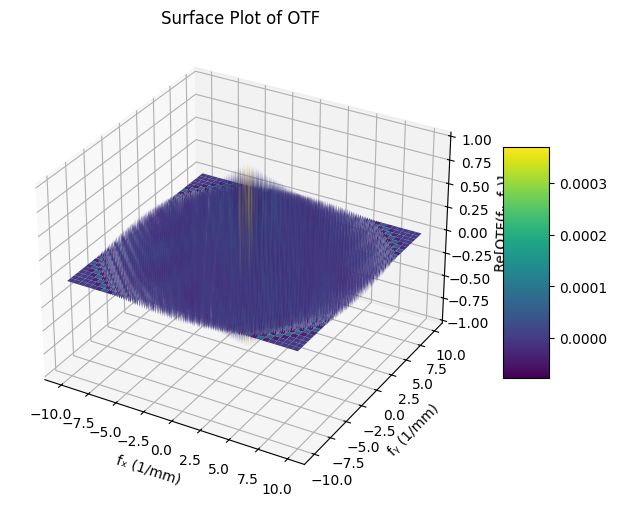

In [12]:
# Compute the Optical Transfer Function
OTF = np.fft.fftshift(np.fft.fft2(PSF))
OTF = np.real(OTF) / np.max(np.abs(OTF))  # Normalize by DC component

# Zoom into central 201x201 region
OTF_zoom = OTF[center - 100 : center + 101, center - 100 : center + 101]

# Plot using imshow (with 'viridis')
plt.figure(figsize=(6,5))
plt.imshow(OTF_zoom, extent=[x_zoom[0], x_zoom[-1], y_zoom[0], y_zoom[-1]], cmap='viridis')
plt.xlabel('fₓ (1/mm)')
plt.ylabel('fᵧ (1/mm)')
plt.title('Optical Transfer Function (OTF)')
plt.colorbar(label='Re[OTF(fₓ,fᵧ)]')
plt.show()

# Surface plot (with 'viridis')
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Xz, Yz, OTF_zoom, cmap='viridis')
ax.set_xlabel('fₓ (1/mm)')
ax.set_ylabel('fᵧ (1/mm)')
ax.set_zlabel('Re[OTF(fₓ, fᵧ)]')
plt.title("Surface Plot of OTF")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


<div class="alert alert-block alert-success">
<font color='black'>

4. Now let’s simulate what an image passing through a system with this pupil function looks like. Make a star pattern by calling the `make_star` function provided in lab 3 course content. You need to provide the axes of your image to the function. Presuming you called your axes variables `x` and `y`, you can make a star pattern with the following code. Please use the same axes as the PSF above, from -50 mm to 50 mm.
    
`from functions import make_star` <br/>
`star = make_star(x, y)`
    
Plot what the star pattern would look like through a system with the PSF and OTF you just calculated. Paste your code and your results below. Explain what you observe.
</font>
</div>

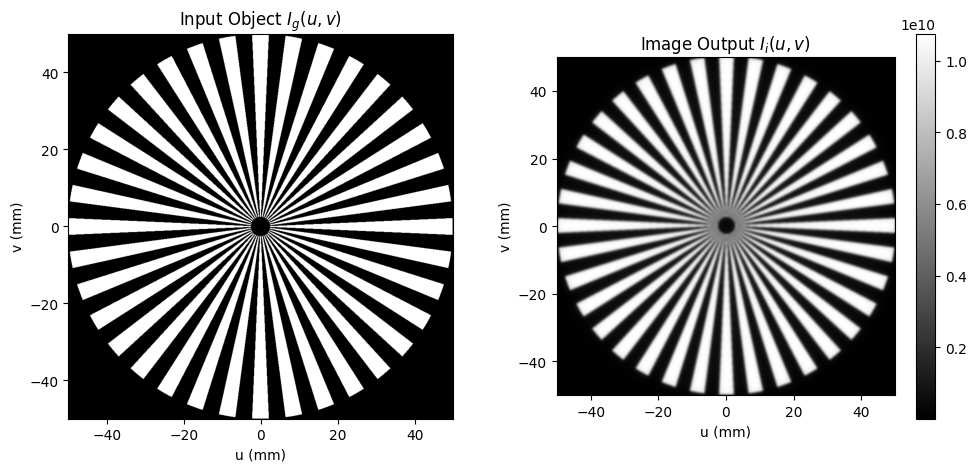

In [13]:
from functions import make_star

# Use the same x, y axes as before
x = np.linspace(-50, 50, 1001)  # mm
y = np.linspace(-50, 50, 1001)
X, Y = np.meshgrid(x, y)

# Make star pattern I_g(u, v)
star = make_star(x, y)

# Image output I_i(u, v) = PSF * I_g via convolution
from scipy.signal import fftconvolve
I_i = fftconvolve(star, PSF, mode='same')  # 2D linear convolution

# Plot input and output image
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(star, extent=[x[0], x[-1], y[0], y[-1]], cmap='gray')
plt.title("Input Object $I_g(u,v)$")
plt.xlabel("u (mm)")
plt.ylabel("v (mm)")

plt.subplot(1, 2, 2)
plt.imshow(I_i, extent=[x[0], x[-1], y[0], y[-1]], cmap='gray')
plt.title("Image Output $I_i(u,v)$")
plt.xlabel("u (mm)")
plt.ylabel("v (mm)")
plt.colorbar()
plt.show()

Explain what you observe: I see that the image output has a blurrier center and less sharp lines compared to the image input. This occurs because the system's PSF is wider. As a result, the OTFattenuates high spatial frequencies, reducing the system’s ability to preserve fine image details. This illustrates how the shape and size of the pupil directly influence image resolution and sharpness.

<div class="alert alert-block alert-success">
<font color='black'>

5. Now let’s the make the aperture smaller. Make a 3mm diameter pupil function. Compute the PSF, OTF, and image output and paste the images below. <br/> What do you see? How does this relate to the observation from the last lab?</font>
</div>

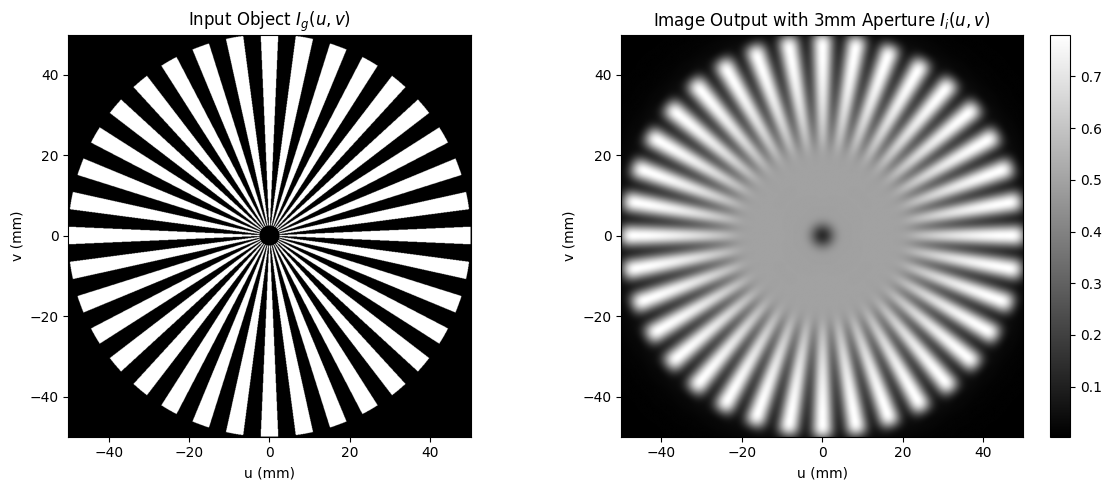

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve

# Define grid
grid = 1001
sampling = 0.1  # mm
x = np.linspace(-50, 50, 1001)  # mm
y = np.linspace(-50, 50, 1001)
X, Y = np.meshgrid(x, y)

# Smaller pupil diameter: 3 mm => radius = 1.5 mm
radius_small = 1.5
P_small = np.sqrt(X**2 + Y**2) <= radius_small

# Compute PSF from pupil
h_uv_small = np.fft.fftshift(np.fft.fft2(P_small))
PSF_small = np.abs(h_uv_small)**2
PSF_small /= PSF_small.sum()  # Normalize PSF

# Compute OTF from PSF
OTF_small = np.fft.fftshift(np.fft.fft2(PSF_small))
OTF_small /= np.max(np.abs(OTF_small))  # Normalize

# Create star input image
star = make_star(x, y)

# Image output via convolution
I_i_small = fftconvolve(star, PSF_small, mode='same')

# Plot: Input and Output Images
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(star, extent=[x[0], x[-1], y[0], y[-1]], cmap='gray')
plt.title("Input Object $I_g(u,v)$")
plt.xlabel("u (mm)")
plt.ylabel("v (mm)")

plt.subplot(1, 2, 2)
plt.imshow(I_i_small, extent=[x[0], x[-1], y[0], y[-1]], cmap='gray')
plt.title("Image Output with 3mm Aperture $I_i(u,v)$")
plt.xlabel("u (mm)")
plt.ylabel("v (mm)")
plt.colorbar()
plt.tight_layout()
plt.show()


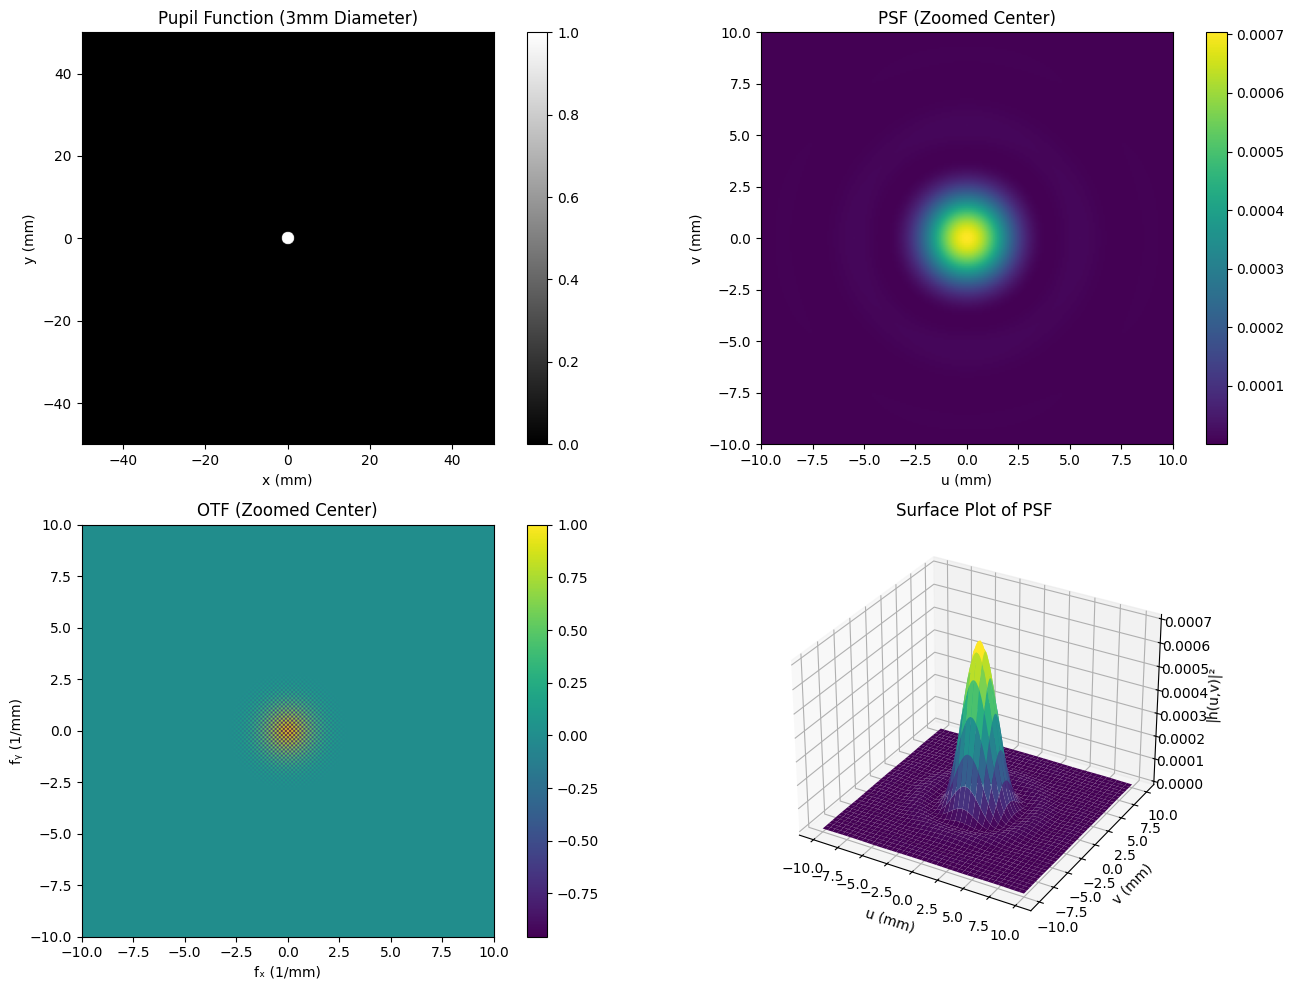

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from functions import make_star

# Define grid
grid = 1001
sampling = 0.1  # mm
x = np.linspace(-50, 50, grid)  # mm
y = np.linspace(-50, 50, grid)
X, Y = np.meshgrid(x, y)

# Smaller pupil diameter: 3 mm => radius = 1.5 mm
radius_small = 1.5
P_small = np.sqrt(X**2 + Y**2) <= radius_small

# Compute PSF from pupil
h_uv_small = np.fft.fftshift(np.fft.fft2(P_small))
PSF_small = np.abs(h_uv_small)**2
PSF_small /= PSF_small.sum()  # Normalize PSF

# Compute OTF from PSF
OTF_small = np.fft.fftshift(np.fft.fft2(PSF_small))
OTF_small = np.real(OTF_small / np.max(np.abs(OTF_small)))  # Normalize

# Create star input image
star = make_star(x, y)

# Image output via convolution
I_i_small = fftconvolve(star, PSF_small, mode='same')

# Extract central 201x201 region for surface plots
center = grid // 2
psf_zoom = PSF_small[center - 100:center + 101, center - 100:center + 101]
otf_zoom = OTF_small[center - 100:center + 101, center - 100:center + 101]
x_zoom = x[center - 100:center + 101]
y_zoom = y[center - 100:center + 101]
Xz, Yz = np.meshgrid(x_zoom, y_zoom)

# Generate main 2D and surface plots
fig = plt.figure(figsize=(14, 10))

# Pupil function
ax1 = fig.add_subplot(221)
im1 = ax1.imshow(P_small, extent=[x[0], x[-1], y[0], y[-1]], cmap='gray')
ax1.set_title("Pupil Function (3mm Diameter)")
ax1.set_xlabel("x (mm)")
ax1.set_ylabel("y (mm)")
plt.colorbar(im1, ax=ax1)

# PSF (Zoomed)
ax2 = fig.add_subplot(222)
im2 = ax2.imshow(psf_zoom, extent=[x_zoom[0], x_zoom[-1], y_zoom[0], y_zoom[-1]], cmap='viridis')
ax2.set_title("PSF (Zoomed Center)")
ax2.set_xlabel("u (mm)")
ax2.set_ylabel("v (mm)")
plt.colorbar(im2, ax=ax2)

# OTF (Zoomed)
ax3 = fig.add_subplot(223)
im3 = ax3.imshow(otf_zoom, extent=[x_zoom[0], x_zoom[-1], y_zoom[0], y_zoom[-1]], cmap='viridis')
ax3.set_title("OTF (Zoomed Center)")
ax3.set_xlabel("fₓ (1/mm)")
ax3.set_ylabel("fᵧ (1/mm)")
plt.colorbar(im3, ax=ax3)

# Surface plot of PSF (non-log)
ax4 = fig.add_subplot(224, projection='3d')
ax4.plot_surface(Xz, Yz, psf_zoom, cmap=cm.viridis, edgecolor='none')
ax4.set_title("Surface Plot of PSF")
ax4.set_xlabel("u (mm)")
ax4.set_ylabel("v (mm)")
ax4.set_zlabel("|h(u,v)|²")

plt.tight_layout()
plt.show()


The star appears blurrier. This makes sense since when the aperture is reduced, the PSF gets larger and wider in the spatial domain. As a result this causes the star to get blurrier.

From last lab, when we changed the aperature from 30, 60, and 100% open, we saw that the 100% aperature had sharp details in the center and outside of the star. However, the smallest aperature (30) still had sharp outside details, but the innermost part of the star was extremely blurred. This aligns with this lab's results, since the high frequency components (center details of the image) was blurred, but the low frequency components (edges and larger details) were preserved when reducing the aperature.

<div class="alert alert-block alert-warning">
<font color='black'>

Of course not all optical systems have circular pupil functions. Now let’s simulate a few other pupil functions and see how they affect the image output. <br/> Construct a pupil function with an annulus and cross shaped obstruction:
</font>
</div>

<img src="Lab3\Pupil_cross.png" style="width:400px">

<div class="alert alert-block alert-success">
<font color='black'>

6. You can construct this in Python by making a disc of 12 mm diameter, subtract a disc of 8 mm diameter, and subtract a central vertical band and a central horizontal band of width 4 mm. <br/>
The Matlab logical operations are going to be helpful for this step:

- and: `np.logical_and(A, B)`
- or: `np.logical_or(A, B)`
- not: `np.logical_not(A)`
    
Paste your code and your pupil function below.
</font>
</div>

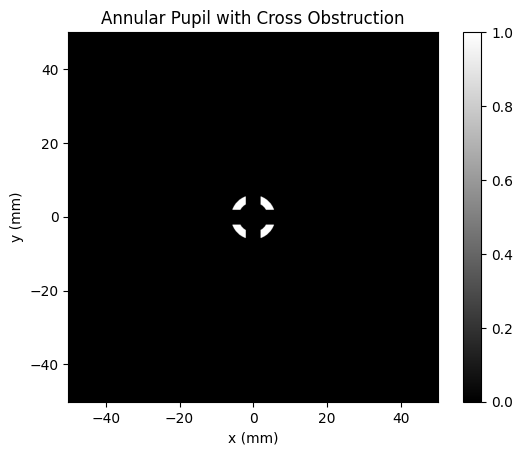

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Grid setup
grid = 1001
sampling = 0.1  # mm
x = np.linspace(-grid//2, grid//2, grid) * sampling
y = np.linspace(-grid//2, grid//2, grid) * sampling
X, Y = np.meshgrid(x, y)

# Create outer and inner circles
outer_radius = 6  # 12 mm diameter
inner_radius = 4  # 8 mm diameter
outer_disc = np.sqrt(X**2 + Y**2) <= outer_radius
inner_disc = np.sqrt(X**2 + Y**2) <= inner_radius

# Annular aperture (ring)
annulus = np.logical_and(outer_disc, np.logical_not(inner_disc))

# Cross obstruction: vertical and horizontal bars, each 4 mm wide
cross_vertical = np.abs(X) <= 2
cross_horizontal = np.abs(Y) <= 2
cross = np.logical_or(cross_vertical, cross_horizontal)

# Final pupil function: annulus minus cross
pupil_cross = np.logical_and(annulus, np.logical_not(cross))

# Display the result
plt.imshow(pupil_cross, extent=[x[0], x[-1], y[0], y[-1]], cmap='gray')
plt.title("Annular Pupil with Cross Obstruction")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.colorbar()
plt.show()


<div class="alert alert-block alert-success">
<font color='black'>

7. Compute the PSF, OTF, and final image output of the star pattern. Paste all images below. Interpret the image output. </font>
</div>

The PSF is directly influenced by the geometry of the pupil function. In this case, the annular pupil with a cross-shaped obstruction removes light in the horizontal and vertical directions. As a result, the PSF exhibits a cross pattern due to diffraction, with suppressed intensity along those directions. This causes directional blurring in the image.

The OTF, which is the Fourier transform of the PSF, shows attenuated frequency components along the horizontal and vertical axes, meaning spatial details in those directions are lost.

As a result, when the PSF is convolved with the star pattern, the output image appears blurred along the cross directions, directly reflecting the influence of the obstructed pupil shape. The output star has a cross pattern, due to the pupil function interfering in the horizontal and vertical directions. This shows how the PSF and image output are changed when the pupil shape is changed.

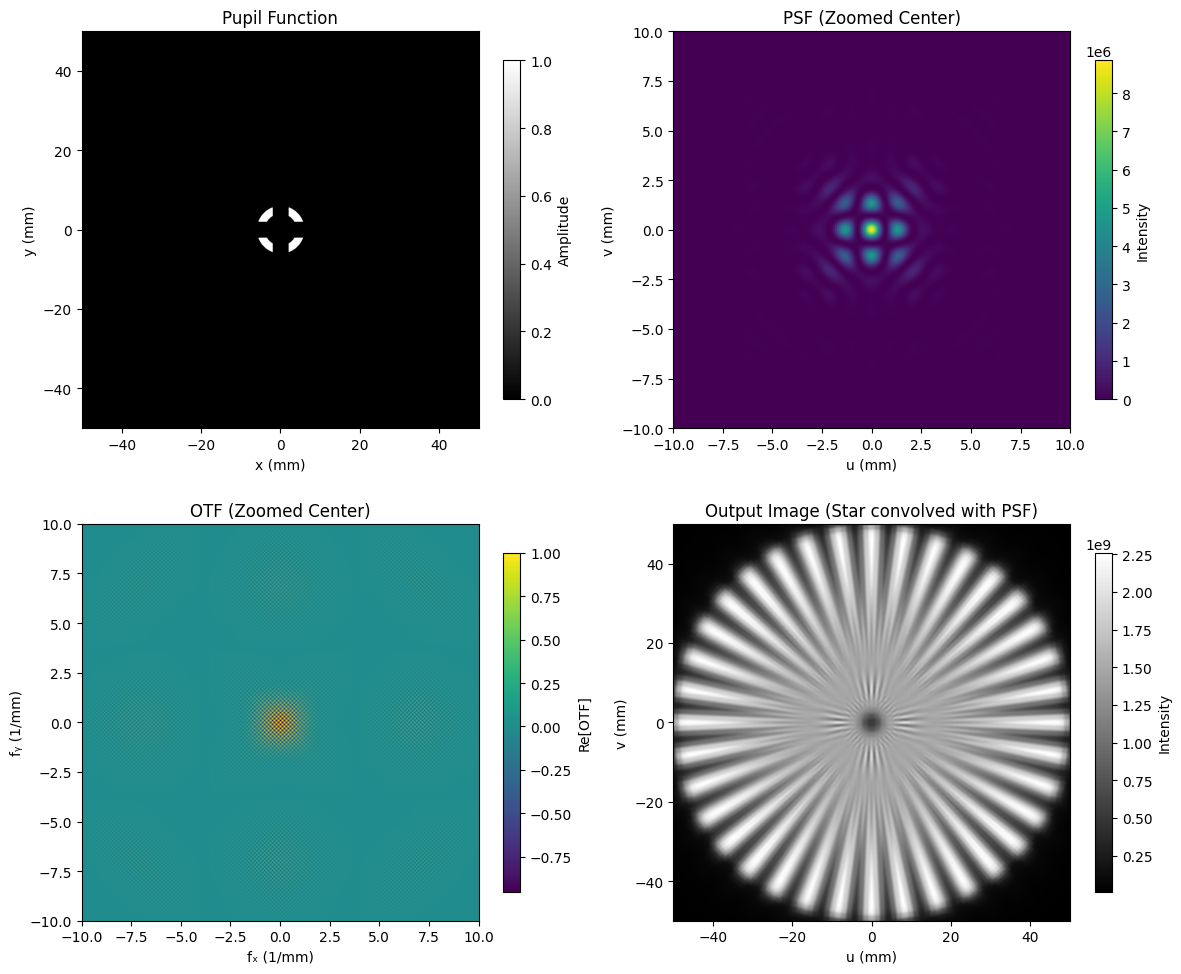

In [17]:
# Compute PSF
h_uv = np.fft.fftshift(np.fft.fft2(pupil_cross))
PSF = np.abs(h_uv)**2

# Compute OTF
OTF = np.fft.fftshift(np.fft.fft2(PSF))
OTF = np.real(OTF / np.max(np.abs(OTF)))  # normalize by DC component

# Create star pattern
x_star = np.linspace(-50, 50, 1001)
y_star = np.linspace(-50, 50, 1001)
star = make_star(x_star, y_star)

# Convolve star with PSF
I_i = fftconvolve(star, PSF, mode='same')

# Visualization
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Pupil function
im0 = axs[0, 0].imshow(pupil_cross, extent=[x[0], x[-1], y[0], y[-1]], cmap='gray')
axs[0, 0].set_title("Pupil Function")
axs[0, 0].set_xlabel("x (mm)")
axs[0, 0].set_ylabel("y (mm)")
fig.colorbar(im0, ax=axs[0, 0], shrink=0.8, label="Amplitude")

# PSF (central crop)
center = grid // 2
psf_zoom = PSF[center - 100:center + 101, center - 100:center + 101]
im1 = axs[0, 1].imshow(psf_zoom, cmap='viridis', extent=[-10, 10, -10, 10])
axs[0, 1].set_title("PSF (Zoomed Center)")
axs[0, 1].set_xlabel("u (mm)")
axs[0, 1].set_ylabel("v (mm)")
fig.colorbar(im1, ax=axs[0, 1], shrink=0.8, label="Intensity")

# OTF (central crop)
otf_zoom = OTF[center - 100:center + 101, center - 100:center + 101]
im2 = axs[1, 0].imshow(otf_zoom, cmap='viridis', extent=[-10, 10, -10, 10])
axs[1, 0].set_title("OTF (Zoomed Center)")
axs[1, 0].set_xlabel("fₓ (1/mm)")
axs[1, 0].set_ylabel("fᵧ (1/mm)")
fig.colorbar(im2, ax=axs[1, 0], shrink=0.8, label="Re[OTF]")

# Output image
im3 = axs[1, 1].imshow(I_i, extent=[x_star[0], x_star[-1], y_star[0], y_star[-1]], cmap='gray')
axs[1, 1].set_title("Output Image (Star convolved with PSF)")
axs[1, 1].set_xlabel("u (mm)")
axs[1, 1].set_ylabel("v (mm)")
fig.colorbar(im3, ax=axs[1, 1], shrink=0.8, label="Intensity")

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<font color='black'>

8. Make the following pupil function in Python. There are two circular apertures of 6mm diameter, each diagonally offset from the origin by 3 mm in the x and y direction.  <br/> Paste your code and your pupil function below. </font>
</div>

<img src="Lab3\Pupil_6mm.png" style="width:400px">

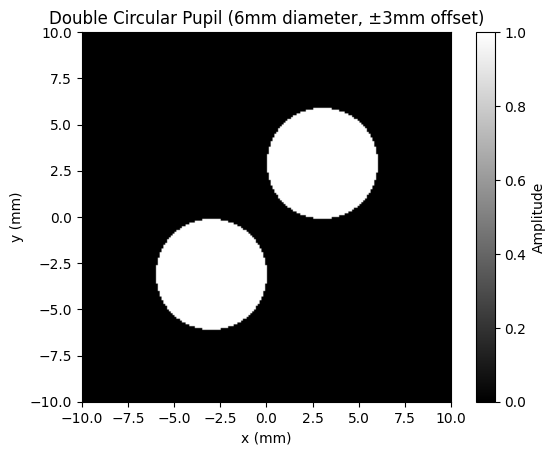

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Grid and sampling setup
grid = 1001
sampling = 0.1  # mm
x = np.linspace(-grid // 2, grid // 2, grid) * sampling
y = np.linspace(-grid // 2, grid // 2, grid) * sampling
X, Y = np.meshgrid(x, y)

# Aperture parameters
radius = 3  # 6mm diameter = 3mm radius
offset = 3  # mm offset in both x and y

# Two circular apertures
circle1 = (X - offset)**2 + (Y + offset)**2 <= radius**2
circle2 = (X + offset)**2 + (Y - offset)**2 <= radius**2

# Combine apertures
double_pupil = np.logical_or(circle1, circle2)

# Display pupil function
plt.imshow(double_pupil, extent=[x[0], x[-1], y[0], y[-1]], cmap='gray')
plt.title("Double Circular Pupil (6mm diameter, ±3mm offset)")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.colorbar(label="Amplitude")
plt.show()

<div class="alert alert-block alert-success">
<font color='black'>

9. Compute the PSF, OTF, and final image output of the star pattern. Paste all images below. Interpret the image output.  </font>
</div>

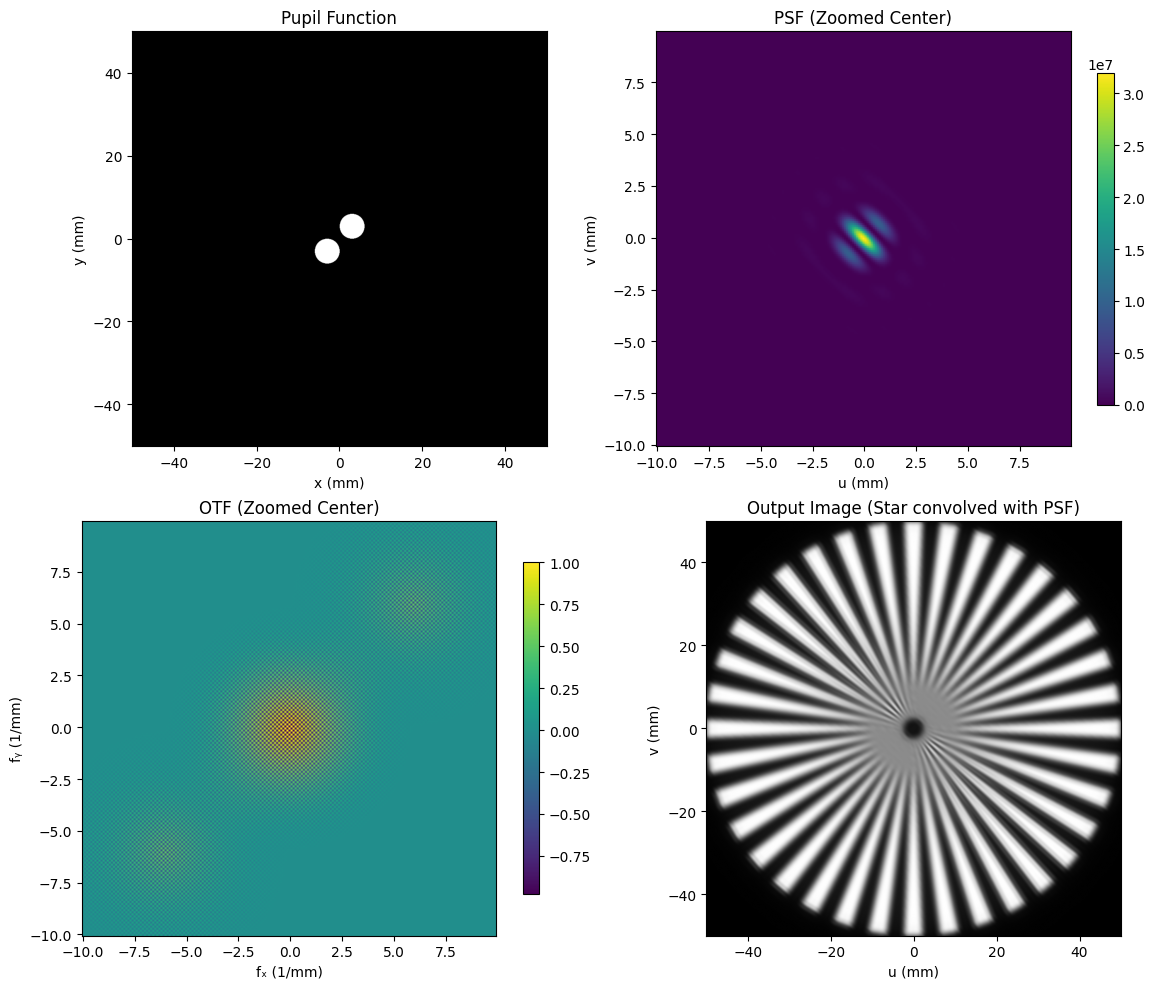

In [19]:
# Compute PSF
h_uv = np.fft.fftshift(np.fft.fft2(double_pupil))
PSF = np.abs(h_uv)**2

# Compute OTF
OTF = np.fft.fftshift(np.fft.fft2(PSF))
OTF = np.real(OTF / np.max(np.abs(OTF)))  # normalize by DC component

# Create star pattern
x_star = np.linspace(-50, 50, 1001)
y_star = np.linspace(-50, 50, 1001)
star = make_star(x_star, y_star)

# Convolve star with PSF
from scipy.signal import fftconvolve
I_i = fftconvolve(star, PSF, mode='same')

# Visualization
center = grid // 2
x_zoom = x[center - 100:center + 101]
y_zoom = y[center - 100:center + 101]
Xz, Yz = np.meshgrid(x_zoom, y_zoom)

psf_zoom = PSF[center - 100:center + 101, center - 100:center + 101]
otf_zoom = OTF[center - 100:center + 101, center - 100:center + 101]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Pupil function
axs[0, 0].imshow(double_pupil, extent=[x[0], x[-1], y[0], y[-1]], cmap='gray')
axs[0, 0].set_title("Pupil Function")
axs[0, 0].set_xlabel("x (mm)")
axs[0, 0].set_ylabel("y (mm)")

# PSF (central crop) with axis bars
im1 = axs[0, 1].imshow(psf_zoom, extent=[x_zoom[0], x_zoom[-1], y_zoom[0], y_zoom[-1]], cmap='viridis')
axs[0, 1].set_title("PSF (Zoomed Center)")
axs[0, 1].set_xlabel("u (mm)")
axs[0, 1].set_ylabel("v (mm)")
fig.colorbar(im1, ax=axs[0, 1], shrink=0.8)

# OTF (central crop) with axis bars
im2 = axs[1, 0].imshow(otf_zoom, extent=[x_zoom[0], x_zoom[-1], y_zoom[0], y_zoom[-1]], cmap='viridis')
axs[1, 0].set_title("OTF (Zoomed Center)")
axs[1, 0].set_xlabel("fₓ (1/mm)")
axs[1, 0].set_ylabel("fᵧ (1/mm)")
fig.colorbar(im2, ax=axs[1, 0], shrink=0.8)

# Output image
axs[1, 1].imshow(I_i, extent=[x_star[0], x_star[-1], y_star[0], y_star[-1]], cmap='gray')
axs[1, 1].set_title("Output Image (Star convolved with PSF)")
axs[1, 1].set_xlabel("u (mm)")
axs[1, 1].set_ylabel("v (mm)")

plt.tight_layout()
plt.show()


The double circular pupil function makes a PSF that appears to be is elongated and exhibits interference patterns due to the spatial separation of the two apertures. The resulting PSF has a lobe-like structure that reflects the diagonal symmetry of the pupil.

Since OTF is the fourier transform of the PSF, the resulting OTF shows some diagonal features as well which result from interference due to the diagonally offset circles in the pupil function.

The output image of the star shows a directional blur in the same diagonal as the two circles in the pupil function. The center is dimmer as well, highlighting how the two circle pupil function introduces interference that affects both image sharpness and contrast in structured patterns.